In [1]:
%matplotlib notebook
import spherical as sp
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
import torch

# Convolutions in the sphere
We follow Krachmalnicoff & Tomasi (A&A, 2019, 628, A129) to define convolutional layers in the sphere using the HEALPix pixelization.

Let us define an HEALPix NSIDE and use the NESTED mapping. We define three layers: a convolutional layer with one input and one output filter, a downsampling layer using average pooling and an upsampling layer that just repeats every pixel.

In [54]:
NSIDE = 16
nest = True

conv = sp.sphericalConv(NSIDE, 1, 1, nest=nest)
down = sp.sphericalDown(NSIDE)
up = sp.sphericalUp(NSIDE // 2)

Define a simple map on the sphere and apply the different layers.

In [55]:
npix = hp.nside2npix(NSIDE)

im = torch.zeros(1,1,npix, requires_grad=False)

im[0, 0, :] = torch.linspace(0.0, 1.0, npix)

Just the convolutional layer:

In [56]:
with torch.no_grad():
    out = conv(im)

<IPython.core.display.Javascript object>


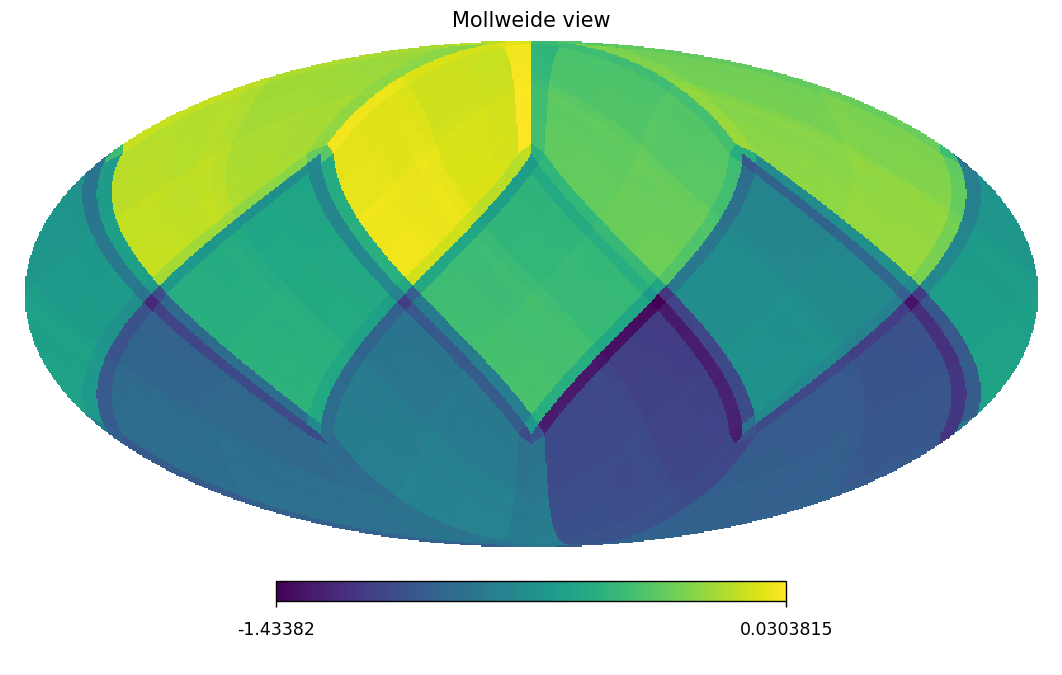

In [57]:
hp.mollview(out[0, 0, :].numpy(), nest=nest)

Convolution+downsampling:

In [58]:
with torch.no_grad():    
    out = conv(im)
    out = down(out)    

<IPython.core.display.Javascript object>


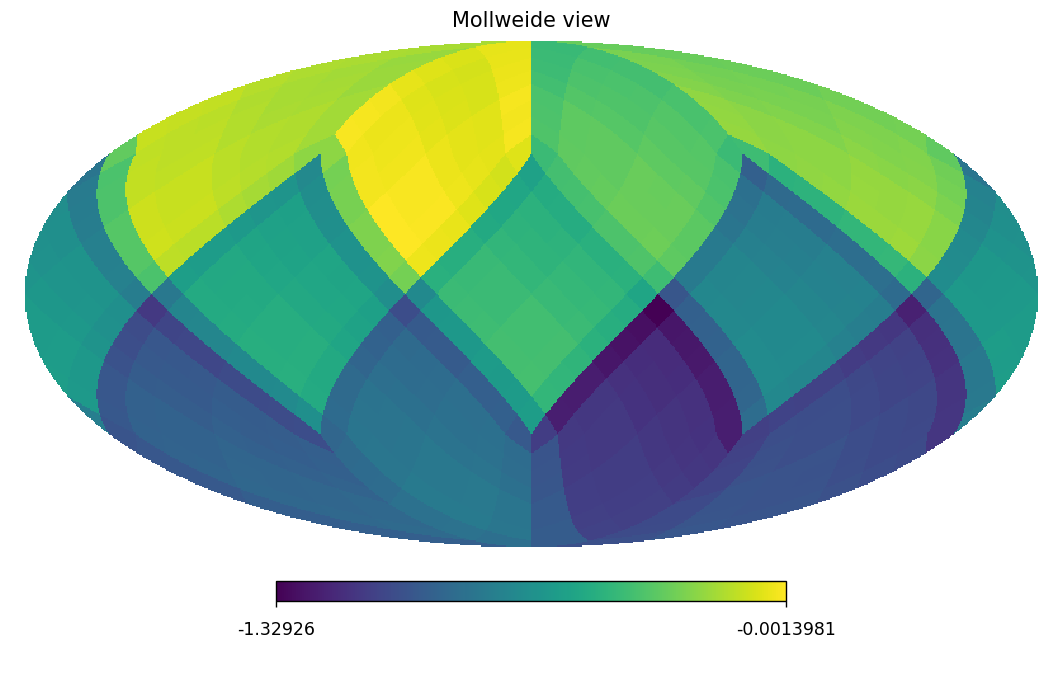

In [59]:
hp.mollview(out[0, 0, :].numpy(), nest=nest)

Convolution+downsampling+upsampling:

In [40]:
with torch.no_grad():    
    out = conv(im)
    out = down(out)    
    out = up(out)

<IPython.core.display.Javascript object>


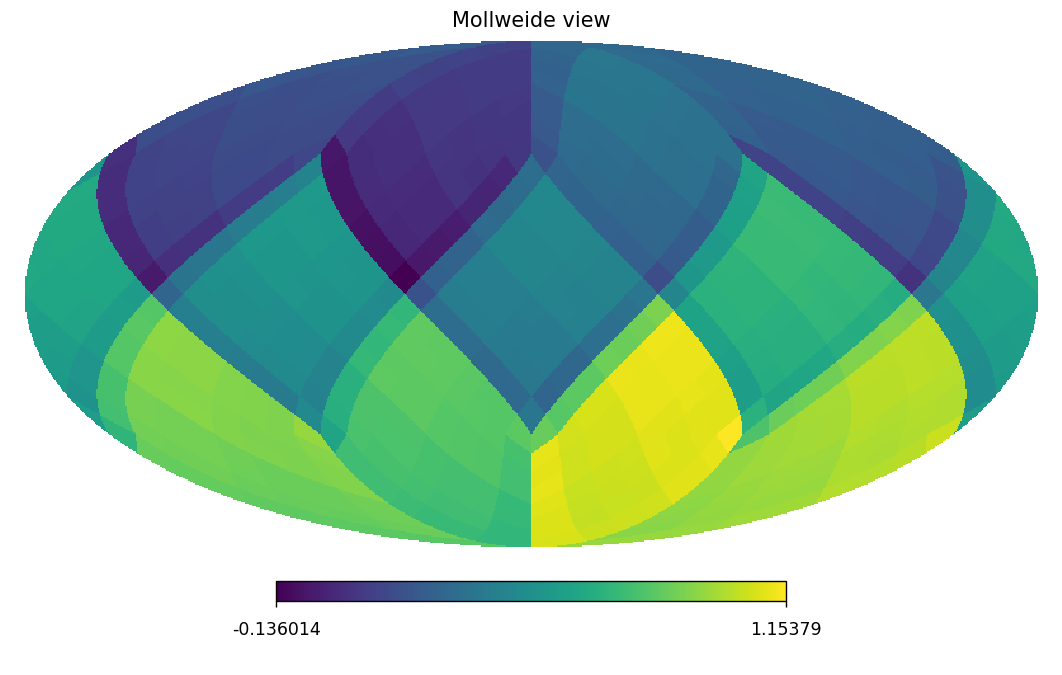

In [41]:
hp.mollview(out[0, 0, :].numpy(), nest=nest)